# --NIVEL 1--
Realiza la conexión en Python con el MySQL Workbench para cargar toda la información que tienes en las tablas.
* 1º Realizo la instalación del conector :

In [6]:
pip install mysql-connector-python


   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/14.5 MB 469.7 kB/s eta 0:00:31
    --------------------------------------- 0.3/14.5 MB 1.8 MB/s eta 0:00:08
   ---- ----------------------------------- 1.5/14.5 MB 7.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/14.5 MB 12.3 MB/s eta 0:00:01
   ----------- ---------------------------- 4.2/14.5 MB 14.8 MB/s eta 0:00:01
   -------------- ------------------------- 5.2/14.5 MB 16.6 MB/s eta 0:00:01
   ----------------- ---------------------- 6.5/14.5 MB 18.0 MB/s eta 0:00:01
   ---------------------- ----------------- 8.3/14.5 MB 20.4 MB/s eta 0:00:01
   --------------------------- ------------ 9.8/14.5 MB 21.5 MB/s eta 0:00:01
   ------------------------------ --------- 11.1/14.5 MB 32.7 MB/s eta 0:00:01
   ------

* 2º Importo el conector para MySQL e indico los datos necesarios para hacer la conexión: 

In [1]:
import mysql.connector

conexion = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="operations"
)

* 3º Importo las librerías que voy a utilizar:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


# Antes de empezar hago una consulta SQL para poder cargar un DataFrame con la información necesaria para poder desarrollar los ejercicios, visualizo la información y el df para comprobar que todo ha salido como esperaba.

In [32]:

df= pd.read_sql('SELECT * FROM transactions JOIN companies ON business_id = company_id JOIN users ON user_id = users.id',con=conexion)
df.info()
df
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            587 non-null    object 
 1   card_id       587 non-null    object 
 2   business_id   587 non-null    object 
 3   timestamp     587 non-null    object 
 4   amount        587 non-null    float64
 5   declined      587 non-null    int64  
 6   product_ids   587 non-null    object 
 7   user_id       587 non-null    int64  
 8   lat           587 non-null    float64
 9   longitude     587 non-null    float64
 10  company_id    587 non-null    object 
 11  company_name  587 non-null    object 
 12  phone         587 non-null    object 
 13  email         587 non-null    object 
 14  country       587 non-null    object 
 15  website       587 non-null    object 
 16  id            587 non-null    int64  
 17  name          587 non-null    object 
 18  surname       587 non-null    

C:\Users\javie\AppData\Local\Temp\ipykernel_7816\3838206793.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql('SELECT * FROM transactions JOIN companies ON business_id = company_id JOIN users ON user_id = users.id',con=conexion)


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude,...,id,name,surname,phone,email,birth_date,country,city,postal_code,address
0,108B1D1D-5B23-A76C-55EF-C568E49A05DD,CcU-2938,b-2222,2021-07-07 17:43:16,293.57,0,59,275,83.78390,-178.8600,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
1,EA2C3281-C9C1-A387-44F8-729FB4B51C76,CcU-2938,b-2222,2021-05-09 10:25:08,119.36,1,"59, 79, 37, 73",275,20.20040,-116.8400,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
2,7DC26247-20EC-53FE-E555-B6C2E55CA5D5,CcU-2945,b-2226,2022-02-04 15:52:56,312.50,0,"71, 41",275,58.93670,-76.8171,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
3,FE96CE47-BD59-381C-4E18-E3CA3D44E8FF,CcU-2945,b-2226,2021-06-15 00:26:29,480.13,1,3,275,-21.88050,-112.5880,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
4,72997E96-DC2C-A4D7-7C24-66C302F8AE5A,CcU-2952,b-2230,2022-01-30 15:16:36,239.87,0,"97, 41, 3",275,43.35840,-17.6580,...,275,Kenyon,Hartman,082-871-7248,convallis.ante.lectus@yahoo.com,"Aug 3, 1982",Canada,Richmond,R8H 2K2,8564 Facilisi. St.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,DAE50B38-3526-4AAF-71DB-4B45D29EB26A,CcU-3827,b-2618,2021-04-25 12:29:04,309.22,0,"13, 5",259,51.74780,114.6450,...,259,Slade,Downs,034-228-4880,nunc@protonmail.net,"May 28, 1994",Canada,Minitonas,T2Y 5Z1,Ap #219-2963 Tristique Road
583,DC5ABC81-6D3F-E8CF-29A9-CC136D6EADB8,CcU-3799,b-2618,2022-03-15 02:15:32,101.32,0,"73, 31",261,-6.94376,-56.6999,...,261,Violet,Weber,019-661-3744,aliquet.metus@hotmail.couk,"Sep 23, 1984",Canada,Ucluelet,W4C 3H8,102-5355 Aliquet. Av.
584,EAD9435C-77C0-3D84-D9A9-BF535EDABE7A,CcU-3694,b-2618,2021-05-01 18:41:40,113.49,0,"11, 67",267,-45.65030,63.6176,...,267,Ocean,Nelson,079-481-2745,aenean@yahoo.com,"Dec 26, 1991",Canada,Charlottetown,85X 3P4,"Ap #732-8357 Pede, Rd."
585,EC243849-3D95-A5B3-29B4-6F8AA1A5B999,CcU-3673,b-2618,2021-03-23 02:17:50,38.03,0,"23, 13",267,-43.14880,-47.0093,...,267,Ocean,Nelson,079-481-2745,aenean@yahoo.com,"Dec 26, 1991",Canada,Charlottetown,85X 3P4,"Ap #732-8357 Pede, Rd."


## Ejercicio 1:  Una variable numérica.
* Analizaré  los importes de las transacciones.  
    * Utilizaré un histograma en el cual vemos por columnas el conteo de transacciones agrupadas por rangos de importes.  
* Histograma:
    * Se crea el gráfico y se indica que trabajaremos con la columna amount del DataFrame que habíamos creado.  
    * Se le pone en el eje X el letrero indicando que son los importes de las transacciones.  
    * En el eje Y se pone otro letrero señalando que es el conteo de las transacciones.  
    * Se le pone título al gráfico.  
   

Text(0.5, 1.0, 'Vista de Importe de Transacciones')

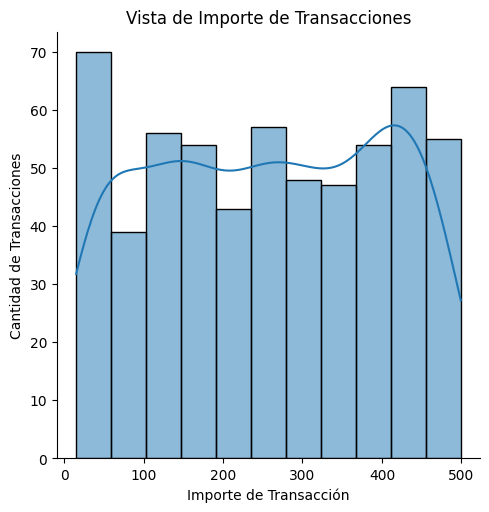

In [33]:
sns.displot( data=df["amount"], kde=True )
plt.xlabel('Importe de Transacción')
plt.ylabel('Cantidad de Transacciones')
plt.title('Vista de Importe de Transacciones')

* Interpretación del Gráfico (Vista de Importe de Transacciones) :  
En este histograma podemos ver información relevante sobre las cantidades de transacciones efectuadas separadas por rangos de importe.  
Se puede apreciar que la mayor parte de ellas (70) son de las de menor importe y el resto parecen seguir la misma media aunque se puede apreciar un pequeño pico en torno a las transascciones por valor en torno de 450.



## Ejercicio 2: Dos variables numéricas.  
* Para este ejercicio mostraré la relación entre los usuarios y las transacciones realizadas , tomando como referencia los importes.  
    * Utilizaré un gráfico de dispersión e intentaré identificar patrones en el.   
* GRÁFICO DE DISPERSIÓN (scatter) :  
    * Para este gráfico tomare las 2 columnas del DataFrame anterior y pondré en el eje X los id de usuario y en el eje Y los importes de las transacciones.  
    * Pongo los label a los ejes X , Y.  
    * Se pone título al gráfico.  
    * Se muestra el gráfico.  

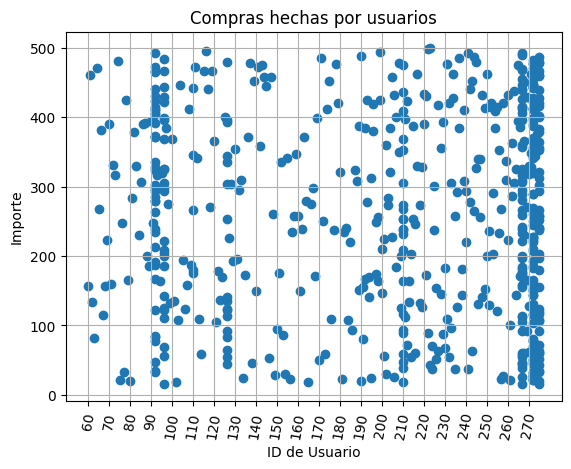

In [34]:
plt.scatter(df['user_id'],df['amount'])
plt.xlabel('ID de Usuario')
plt.ylabel('Importe')
plt.title('Compras hechas por usuarios')
plt.grid()
plt.xticks(range(min(df['user_id']), max(df['user_id'])+1, 10),rotation=80)
plt.show()


* Interpretación del Gráfico (Compras hechas por usuarios) :  
Como resultado del gráfico podemos ver la dispersión de las transacciones pero se nota claramente de que los usuarios con ID entre el 90 y 100 y especialmente entre 265 en adelante son los que han efectuado la mayor cantidad de transacciones ya que es donde se concentra la mayor cantidad de puntos. 


## Ejercicio 3: Una variable categórica.  
* En este caso he decido mostrar la distribución de usuarios que tiene cada país.  
    * Hago una consulta SQL y la asigno a un nuevo DataFrame.  
    * En este caso para que me ayude en el gráfico he decidido utilizar el nombre de los países como indice.  
    * Se muestra la información del DataFrame que he creado.  
    * Se hace una visualización del DataFrame.

In [35]:
df = pd.read_sql('SELECT country, count(id) As conteo FROM users GROUP BY country',con=conexion)
df = df.set_index('country')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, United States to Canada
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   conteo  3 non-null      int64
dtypes: int64(1)
memory usage: 48.0+ bytes


C:\Users\javie\AppData\Local\Temp\ipykernel_7816\3949778469.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT country, count(id) As conteo FROM users GROUP BY country',con=conexion)


,conteo
country,
United States,150
United Kingdom,50
Canada,75


* GRÁFICO DE PASTEL (pie):  
    * Indico los campos que utilizaré para rellenar el pastel donde conteo será el valor del porcentaje que representa y country actuará de indice como ya lo había indicado.  
    * Se define el tamaño del gráfico.  
    * Se crea el gráfico pie.  
    * Le pongo un título que será Usuarios por País.  
    * Creo una caja donde se mostrarán los nombres de los países indicando su tamaño y ubicación en el gráfico.  
    * Finalmente , muestro el gráfico.

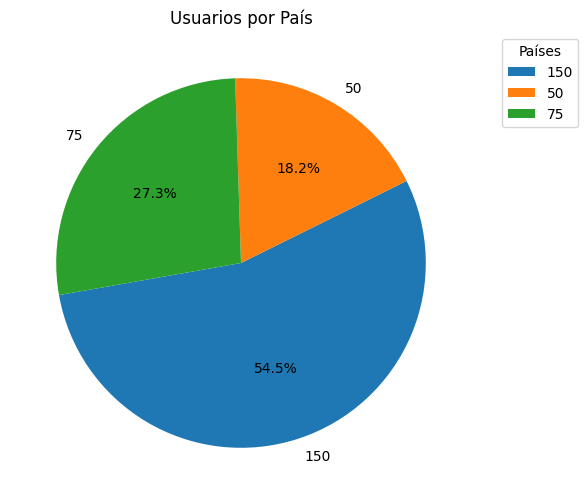

In [15]:
conteo = df['conteo']
country = df.index  
plt.figure(figsize=(6, 6))
plt.pie(conteo, labels=df['conteo'], autopct='%1.1f%%', startangle=190)
plt.title('Usuarios por País')
plt.legend(title = "Países", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

* Interpretación del Gráfico (Usuarios por País) :  
Este gráfico nos muestra de una manera clara de que la totalidad de los usuarios que tiene la empresa estan distribuidos en 3 países:  
    * Canadá
    * Estados Unidos
    * Reino Unido  
El gráfico de pastel nos muetra el porcentaje de cada país en la repartición general donde claramente Estados Unidos es donde tenemos el grueso de usuarios de la empresa.  
Dependiendo de los objetivos de la empresa se puede adoptar una estratégia para incrementar la participación de los que están por debajo en porcentaje de participación o si se considera oportuno definir un plan de expanción donde se pueda captar usuarios de otro país aprovechando la referencia sólida conseguida en estos tres primeros.

# Ejercicio 4: Una variable categórica y una numérica.
* Para este ejercicio tomaré la suma de las ventas y las agruparé por países , de esta manera se representarán las dos variables solicitadas en el ejercicio.
    * Hago una consulta SQL para conseguir la información y la guardo en un DataFrame.
    * Muestro la información del DataFrame creado.
    * Finalmente muestro el DataFrame.

In [36]:
df = pd.read_sql('SELECT sum(amount) AS samount , country FROM transactions JOIN companies ON business_id = company_id GROUP BY country ',con=conexion)
df.info()
df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   samount  15 non-null     float64
 1   country  15 non-null     object 
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


C:\Users\javie\AppData\Local\Temp\ipykernel_7816\4052551898.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT sum(amount) AS samount , country FROM transactions JOIN companies ON business_id = company_id GROUP BY country ',con=conexion)


,samount,country
0,28815.98,Germany
1,2784.63,Australia
2,5256.05,United States
3,2445.05,New Zealand
4,17286.71,Norway
5,27073.17,United Kingdom
6,3427.03,Italy
7,2965.92,Belgium
8,20588.59,Sweden
9,17193.12,Ireland


* GRÁFICO DE BARRAS (bar):  
    * En el eje x pondré los países y en el eje y la suma de las ventas.  
    * Una vez he asignado los valores a las veriables respectivas creo el gráfico de barras.  
    * Pongo los letreros de los ejes para que la imagen sea facil de interpretar.  
    * Coloco un título al gráfico.  
    * Como los nombres de los países se solapaban y no se veía bien , he utilizado ticks en el eje X para indicar que los valores se roten en 80 para que se pueda leer claramente el nombre de cada país.  
    * Finalmente muesro el gráfico.

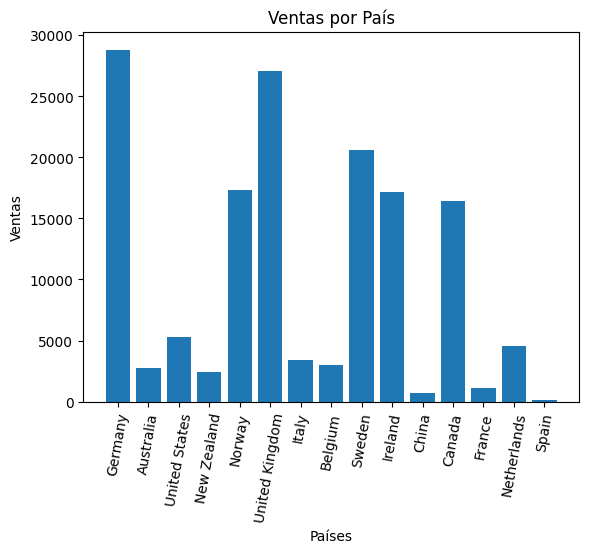

In [37]:
eje_x = df['country']
eje_y = df['samount']
plt.bar(eje_x, eje_y)
plt.xlabel('Países')
plt.ylabel('Ventas')
plt.title('Ventas por País')
plt.xticks(rotation=80)
plt.show()


* Interpretación del Gráfico (Ventas por País) :  
En este gráfico se muestra la suma total de las ventas efectuadas por cada país donde podemos apreciar de que Alemania es el que va a la cabeza muy cerca de alcanzar los 30000€ ,seguido de Reino Unido que sobrepasa los 25000€.  
De la misma manera se ve que España , China y Francia son los 3 que peor resultado están consiguiendo y están muy por debajo de los otros por lo que podemos recomnedar que es necesario tomar acciones para incrementar las ventas en dichos países y valorar los recursos destinados para esos paises.

# Ejercicio 5: Dos variables categóricas.  
Siguiendo el consejo de Lucía a partir de ahora utilizaré un solo DataFrame para los ejercicios siguientes ya que cómo me comentó si bien lo estaba haciendo de una manera aceptable al hacer una consulta por cada ejercicio , al tener una sola consulta el rendimiento del procesador se vería menos afectado .

In [40]:
df = pd.read_sql('SELECT country, count(declined) AS rechazadas FROM transactions JOIN companies ON business_id = company_id WHERE declined = 1 GROUP BY country',con=conexion)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     15 non-null     object
 1   rechazadas  15 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 372.0+ bytes


C:\Users\javie\AppData\Local\Temp\ipykernel_7816\3398036305.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT country, count(declined) AS rechazadas FROM transactions JOIN companies ON business_id = company_id WHERE declined = 1 GROUP BY country',con=conexion)


,country,rechazadas
0,United States,8
1,Canada,4
2,New Zealand,5
3,Sweden,11
4,Germany,7
5,Norway,7
6,Spain,1
7,Netherlands,8
8,Australia,6
9,France,3


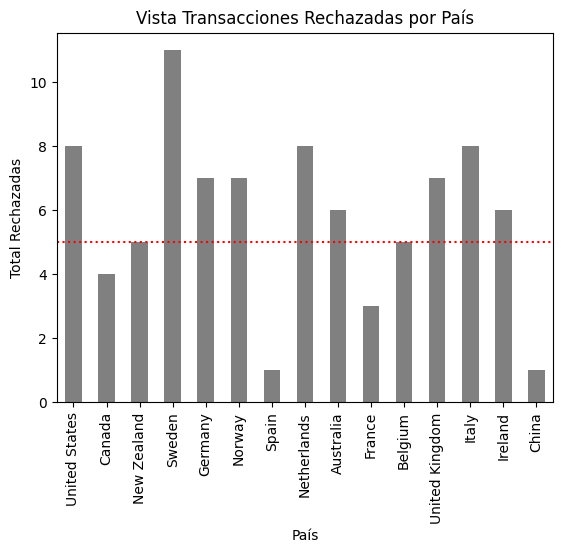

In [48]:
df.plot(kind='bar', x='country', y='rechazadas', legend=False, color='grey')
plt.title('Vista Transacciones Rechazadas por País')
plt.xlabel('País')
plt.ylabel('Total Rechazadas')
plt.axhline(y=5, color='red', linestyle=':')
plt.show()


* Interpretación del Gráfico (Ventas por País) :  
En este gráfico se muestra la suma total de las ventas efectuadas por cada país donde podemos apreciar de que Alemania es el que va a la cabeza muy cerca de alcanzar los   30000€ ,seguido de Reino Unido que sobrepasa los 25000€.
De la misma manera se ve que España , China y Francia son los 3 que peor resultado están consiguiendo y están muy por debajo de los otros por lo que podemos recomnedar que es necesario tomar acciones para incrementar las ventas en dichos países y valorar los recursos destinados para esos paises.